In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')

import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import random
import textwrap

In [2]:
df = pd.read_csv('data/3-accidents-dummies-next.csv')

In [3]:
df.shape

(2898031, 33)

In [4]:
df.drop('Unnamed: 0', 1, inplace=True)

In [5]:
df.head()

,TMC,Severity,Start_Time,End_Time,Distance(mi),Side,City,County,State,Zipcode,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,0.01,R,Dayton,Montgomery,OH,45424,...,0,0,0,0,0,0,0,0,0,0
1,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,0.01,L,Reynoldsburg,Franklin,OH,43068,...,0,0,0,0,0,0,0,0,0,1
2,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,0.01,R,Williamsburg,Clermont,OH,45176,...,0,0,0,0,0,1,0,0,1,1
3,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,0.01,R,Dayton,Montgomery,OH,45417,...,0,0,0,0,0,0,0,1,1,1
4,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,0.01,R,Dayton,Montgomery,OH,45459,...,0,0,0,0,0,1,1,1,1,1


In [6]:
state_df = df.State.value_counts().to_frame()

In [7]:
state_df.reset_index(inplace=True)

In [8]:
state_df

,index,State
0,CA,645967
1,TX,290931
2,FL,219740
3,SC,143349
4,NC,141354
5,NY,136107
6,PA,88866
7,MI,88390
8,IL,86056
9,GA,82215


In [9]:
state_df.rename(columns={'index': 'State', 'State':'Frequency'}, inplace=True)

In [10]:
state_df.sort_values(by='State', inplace=True)

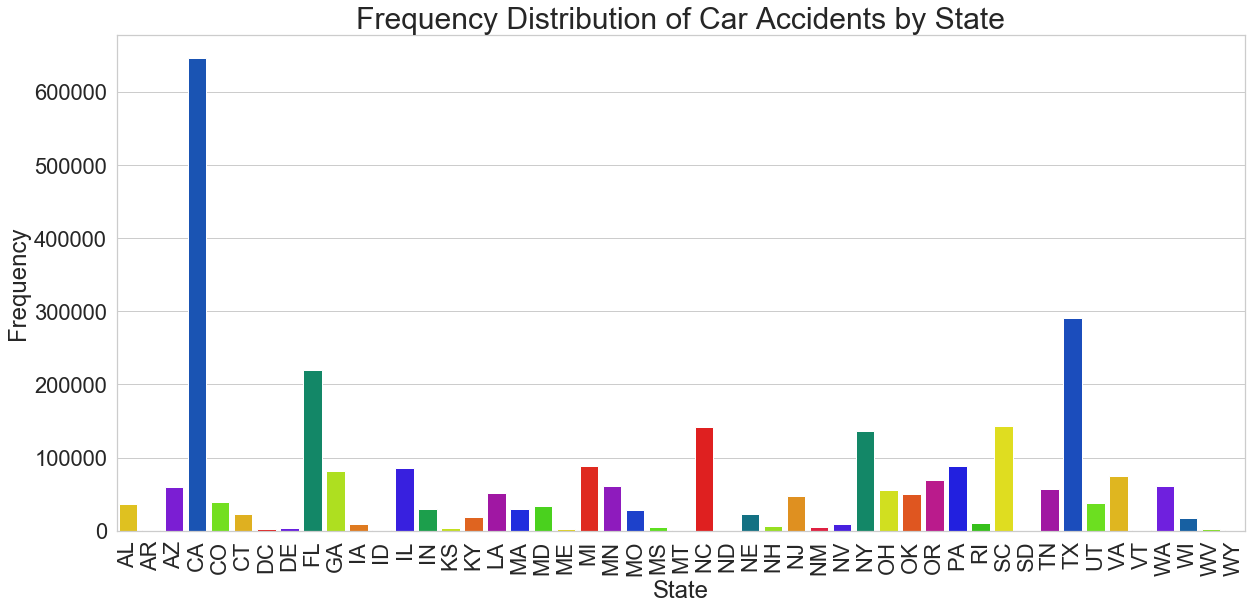

In [51]:
sns.set(style='whitegrid',
        palette='CMRmap',
        font_scale=2, 
        color_codes=True)

fig, ax = plt.subplots(figsize=(18,9))
ax = sns.barplot('State', y='Frequency',
                data=state_df,
                palette='prism_r')
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=90)
ax.set_title('Frequency Distribution of Car Accidents by State',
            fontsize=30)
plt.tight_layout()
plt.savefig('img/Frequency_dist_by_state.jpg')

In [54]:
city_df = df.City.value_counts().to_frame()

In [55]:
city_df.reset_index(inplace=True)

In [58]:
city_df.rename(columns={'index': 'City', 'City': 'Count'}, inplace=True)

In [59]:
city_df

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los Angeles,65400
3,Austin,58027
4,Dallas,57688
...,...,...
11502,Sheridan Lake,1
11503,Branscomb,1
11504,Robinsonville,1
11505,Cut Bank,1


In [82]:
(91003/2898031) * 300

9.420499642688432

In [65]:
total_acc = np.sum(city_df.Count)

In [66]:
total_acc

2898031

In [72]:
city_df.Count.values

array([91003, 67872, 65400, ...,     1,     1,     1])

In [203]:
test_string = ''
couples = []
for city, count in zip(city_df.City.values, city_df.Count.values):
    if len(city.split(' ')) >= 2:
        weight = int((count/total_acc) * 1000)
        wrapper = textwrap.TextWrapper(width=30)
        new_city = wrapper.wrap(text=city)
        couples += new_city * weight
#         list1.append((city * weight)
    else:
        weight = int((count/total_acc) * 1000)
        word = (city + ' ') * weight
        test_string += word
test_string

'Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Raleigh Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Atlanta Miami Miami Miami Miami Miami Miami Miami Miami 

In [201]:
couples

['Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Los Angeles',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Oklahoma City',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'Baton Rouge',
 'San Antonio',
 'San Antonio',
 'San Antonio',
 'San Antonio',
 'San Antonio',
 'San Antonio',
 'San Antonio',
 'San Diego',
 'San Diego',
 'San Diego',
 'San Diego',
 'San Diego',
 'San Diego',
 'San Diego',
 'San Jose',
 'San Jose',
 'San Jose',
 'San Jose',
 'San Jose',
 'Saint Paul',
 'Saint Paul',
 'S

In [154]:
len(word_string)

0

In [212]:
city_cloud = WordCloud(background_color='white', 
                       max_font_size=50,
                      max_words=4000,
                      collocations=False)

city_cloud.generate(test_string)

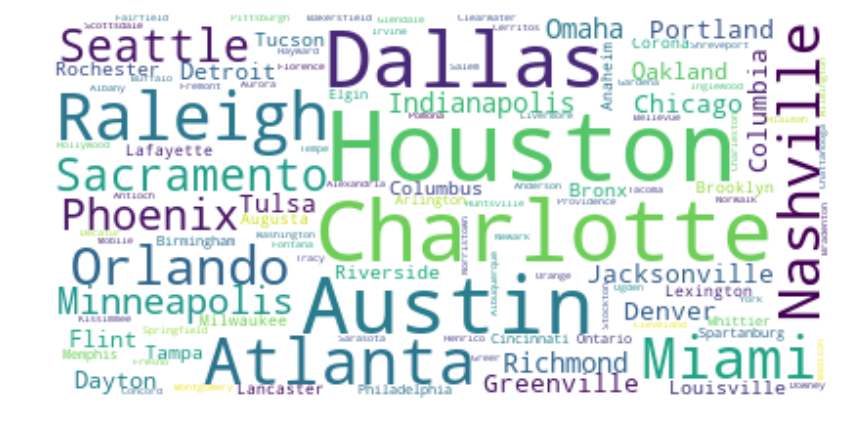

In [213]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(city_cloud, interpolation='bilinear')
plt.axis('off')
# plt.figure(figsize=(12,7))

plt.show()

In [243]:
city_df['City'] = city_df['City'].str.replace(' ', '_')

In [269]:
city_df.sample(10)

,City,Count
704,Abington,677
3602,Loleta,48
10197,Wausa,1
4332,Cornelia,31
6944,Dennis,8
9706,Campti,2
10436,Boomer,1
1540,Florissant,233
7390,Snow_Camp,6
5506,Clay,16


In [270]:
just_string = ''
for city, count in zip(city_df.City.values, city_df.Count.values):
        weight = int((count/total_acc) * 1000)
        word = (city + ' ') * weight
        just_string += word

just_string

'Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Houston Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Charlotte Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Los_Angeles Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Austin Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dallas Dalla

In [271]:
stopwords = set(STOPWORDS)

In [272]:
city_cloud = WordCloud(background_color='white', 
                       max_font_size=50,
                      max_words=2500,
                      collocations=False,
                      stopwords=stopwords)

city_cloud.generate(just_string)

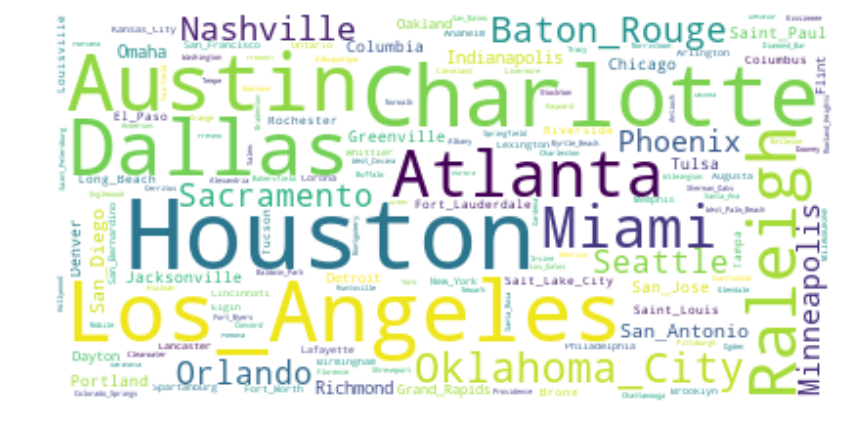

In [273]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(city_cloud, interpolation='bilinear')
plt.axis('off')
# plt.figure(figsize=(12,7))

plt.show()

In [268]:
city_df

,City,Count
0,Houston,91003
1,Charlotte,67872
2,Los_Angeles,65400
3,Austin,58027
4,Dallas,57688
...,...,...
11502,Sheridan_Lake,1
11503,Branscomb,1
11504,Robinsonville,1
11505,Cut_Bank,1
